# ASSIGNMENT 4: Convolution, Correlation and Window Functions

## Convolution and Correlation
Convolution describes how a system transforms an input signal to an output signal. Correlation can be used
to measure similarities between different signals or processes. It can be used when signal is searched from
noise. Convolution and correlation are similar, but in convolution the order of the other data sequence is
reversed.

A digital linear time invariant (LTI) system with impulse response <i>h</i> produces an output signal <i>y</i> for input
signal <i>x</i> which can be calculated using convolution:

$$y(n)=\sum_{l=0}^{N-1} x(l) h(n-l) \quad \text{(4-1)}$$

The cross-correlation of signals x1 and x2 can be calculated with

$$x_{c}(n)=\sum_{l=0}^{N-1} x_{1}(l) x_{2}(l+n) \quad \text{(4-2)}$$

In Python the same calculations can be done with
```python
y = signal.convolve(x, h) # linear convolution
xc = signal.convolve(np.flip(x1), x2) # cross- or auto-correlation
```
or
```python
xc = signal.correlate(x1, x2) # cross- or auto-correlation
```
The last command performs auto-correlation if the sequences x1 and x2 are the same. The correlation can be
plotted with
```python
dd = np.arange(-len(xc)/2, len(xc)/2)
plt.stem(dd, xc)
```

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

**Task 4.1** Generate a random ±1 data signal **seq1** with the command
```python
seq1 = rnd_seq(L)
```
Use signal length L=32. Generate and plot the autocorrelation **autoc** (the same as cross-correlation
with itself) of the sequence seq1.

In [6]:
def rnd_seq(L):
    """
    rnd_seq(L)
    
    input:
    L: length of random sequence
    
    output:
    seq: random sequence of +-1:s
    """
    
    # construct random signal 
    index = np.random.rand(L) >= 0.5
    return np.ones(L) - 2*index

<StemContainer object of 3 artists>

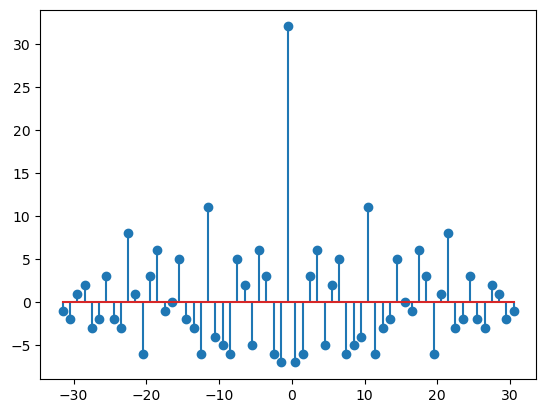

In [7]:
# generate a random signal called seq1
seq1 = rnd_seq(32)

# calculate and plot the autocorrelation of seq1
xc1 = signal.correlate(seq1, seq1)
dd1 = np.arange(-len(xc1)/2, len(xc1)/2)

plt.stem(dd1,xc1)


**What is the maximum value of the autocorrelation?** You can use the *max* function to find the
maximum value.

In [9]:
max(xc1)

32.0

**Task 4.2** Generate a noisy signal **seq1_noisy** by adding normally distributed noise to the sequence
**seq1**. The variance of noise should be v = 0.25 and it will be generated with:
```python
noise = np.sqrt(v) * np.random.randn(L)
```
Calculate and plot the cross-correlation **xc1** for signals **seq1_noisy** and **seq1**.

<StemContainer object of 3 artists>

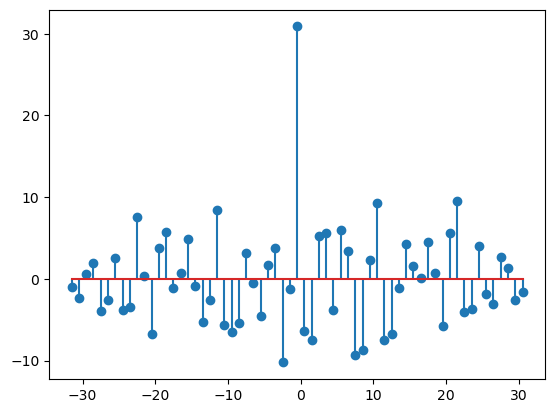

In [11]:
# generate normally distributed noise
noise = np.sqrt(0.25) * np.random.randn(32)

# create the noisy signal
seq1_noisy = seq1 + noise

# calculate and plot the cross-correlation
xc2 = signal.correlate(seq1, seq1_noisy)
plt.stem(dd1,xc2)


**What is the maximum value of the cross-correlation?**

In [13]:
max(xc2)

30.894622896275123

**Task 4.3** Generate another data sequence **seq2** and noisy data sequence **seq2_noisy** like explained in
Tasks 4.1 and 4.2. Notice that the new sequence contains different values from the first signal. Calculate and plot the
cross-correlation **xc2** between the noisy signal **seq2_noisy** and the clean random signal **seq1**.

<StemContainer object of 3 artists>

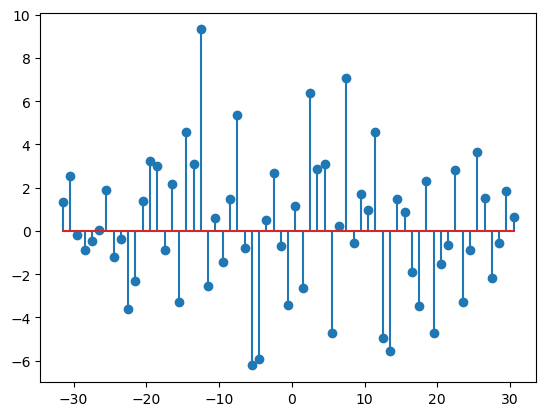

In [15]:
# generate the new sequence
seq2 = rnd_seq(32)

# add noise
noise2 = np.sqrt(0.25) * np.random.randn(32)
seq2_noisy = seq2 + noise2

# calculate and plot the cross-correlation
xc3 = signal.correlate(seq1, seq2_noisy)
plt.stem(dd1,xc3)


**What is the maximum value of the cross-correlation?**

In [17]:
max(xc3)

9.316472969856111

**Task 4.4  How the can the cross-correlation be used in data sequence detection?** Use an assumption
that an unknown data sequence is sent to a noisy channel, and the receiver should decide if the sequence
is the one the receiver is waiting for or some other sequence.

Cross-correlation measures the similarity of two signals as a function of time shift applied to one of them, so when the maximum of the cross-correlation between the noisy signal and the sequence the receiver is waiting for is above a defined threshold, the sequence can be said to exist in the noisy signal at that certain time shift.

## FIR filter design using window functions
In the window method the ideal frequency response $H_D(ω)$ of the desired filter is specified first. Impulse
response $h_D(n)$ of the filter is got by evaluating the inverse Fourier transform of $H_D(ω)$. Because $H_D(ω)$ is
rectangular, $h_D(n)$ is infinitely long and not causal. This is why $h_D(n)$ must be cut and moved forward to begin
from the origin. Cutting of $h_D(n)$ corresponds to multiplying it by rectangular window. This corresponds to
convolution of $H_D(ω)$ with sinc function and causes oscillations in the amplitude response of the desired
filter. Other windows, like Hanning, Hamming, Blackman or Kaiser window, which cause fewer oscillations,
are normally used.

Steps of the window method:
- specify the ideal frequency response $H_D(ω)$ of the desired filter
- calculate the impulse response $h_D(n)$ by the inverse Fourier transform
- select a window that satisfies pass-band and stop-band specifications, and the number of taps which determine the transition width
- coefficients $h(n)$ of the desired filter are obtained by multiplying $h_D(n)$ by values $w(n)$ of the selected window function, namely

$$h(n)=h_D(n)w(n) \quad \text{(4-3)}$$

**Task 4.5** Use the function *impid* to generate a cut and timeshifted impulse response hd of an ideal lowpass filter with the command
```python
hd = impid(fp, L)
```
where fp is the normalized passband edge frequency and L is the length of the filter. Use fp = 0.3 if your student number is odd or fp = 0.2 if your student number is even and L = 33. Plot the ideal impulse response **hd**.

In [22]:
def impid(fcut, L):
    """
    impid(fcut, L)
    
    inputs:
    fcut: normalized passband edge frequency [0, 0.5], fs = 1
    L: length of signal in samples
    
    returns:
    hd: truncated and time shifted version of the 
        ideal filter impulse response
    """
    # length of causal truncated filter
    n = np.arange(0, L)

    # truncated and shifted ideal impulse response h
    M = (L-1) / 2
    hd = 2 * fcut * np.ones(L) # when n == 0
    i = (n - M) != 0
    hd[i] = np.sin(2*np.pi*fcut*(n[i]-M)) / (np.pi*(n[i]-M)) # for non-zero indices only
    return np.conj(hd)

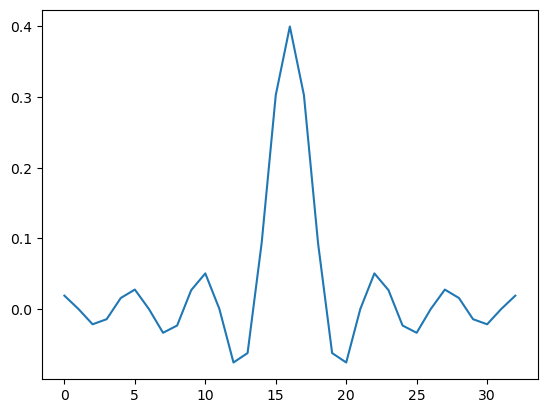

In [23]:
# generate and plot the impulse response
# student number is even so fp = 0.2
hd = impid(0.2, 33)
plt.plot(hd)


**Task 4.6** The Python package `scipy.signal` has many built-in window functions. Create rectangular (**w_rect**) and
Hamming (**w_ham**) windows. Use the functions *boxcar* and *hamming* found in the package `scipy.signal` and the same signal length **L** as in the task 4.5 for both windows. For example, a rectangular window can be created with:
```python
w_rect = signal.boxcar(L)
```
Create impulse responses of two filters **h_rect** and **h_ham** using rectangular and hamming windows
(**w_rect** and **w_ham**) and the impulse response of an ideal lowpass filter (**hd**). This is done by
multiplying the elements of hd by those of the rectangular and hamming windows. In python the *-operator can be used to calculate the element-wise multiplication between two NumPy arrays. For example,
```python
h_rect = hd * w_rect
```

In [25]:
# create the rectangular and hamming windows
w_rect = signal.windows.boxcar(33)
w_ham = signal.windows.hamming(33)

# calculate the impulse responses h_rect and h_ham
h_rect = hd * w_rect
h_ham = hd * w_ham


Plot the 512-point amplitude spectrum (not the complex valued frequency response calculated with fft)
of both of the filters in the same figure using the *subplots* or <i>subplot</i> function. You can compute the 512-point
frequency response by passing a length parameter to the function *fft*. For example,
```python
H_rect = np.fft.fft(h_rect, 512)
```

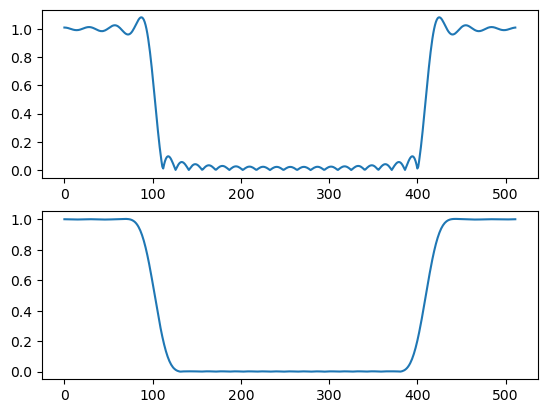

In [27]:
# calculate the frequency responses using fft
H_rect = np.fft.fft(h_rect, 512)
H_ham = np.fft.fft(h_ham, 512)

# plot the amplitude spectra of the filters
y, ax = plt.subplots(2,1)
ax[0].plot(np.abs(H_rect))
ax[1].plot(np.abs(H_ham))

Look at the amplitude responses of the filters **h_rect** and **h_ham**. **What is the essential difference
between the amplitude responses?**

There is much less passband and stopband ripple with the Hamming window being used.

### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment4_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.